# Computational Code and Output

### Reading in, wrangling, and visualizing the data:

The chosen dataset is the Bike Sharing Dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset). The dataset contains hourly and daily counts of the number of bikes used in the Capital bikeshare system between 2011 and 2012. The dataset also contains information about the weather, holidays, and other pertinent seasonal information for each observation. There are two forms of the dataset, `hour` and `day`. `hour` contains information about the hour (0 to 23) that the bike was used, while `day` does not. I will be using the `hour` dataset.

In [1]:
# loading appropriate libraries
library(tidyverse)
library(GGally)
library(infer)
library(repr)
library(rlang)
library(broom)

# reading the data off the web, unzipping the file, and extracting the `hour` dataset
bike_zipped <- download.file(destfile = "bike", 
                             url = "https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip")
bike_unzipped <- unzip("bike")
bike_data_full <- read_csv("hour.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘rlang’


The following objects are masked from ‘package:purrr’:

    %@%, flatten, flatten_chr, flatten_dbl, flatten_int, flatten_lgl,
    flatten_raw, invoke, splice


Rows: 17379 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (16): instant, season, yr, mnth, hr, holiday, weekday, workingday, weat...
date 

As we can see in the `glimpse` below, the `hour` dataset contains 17,379 observations with 16 true variables. `instant` is the record index and is not a variable. The variables (columns) in the dataset are:
* `dteday` is the date in YYYY-MM-DD format
* `season` is the season (dbl), with 1 being winter, 2 being spring, 3 being fall, and 4 being summer
* `yr` is the year (dbl), with 0 being 2011 and 1 being 2012
* `mnth` is the month (dbl), from 1 to 12
* `hr` is the hour of the day (dbl), from 0 to 23
* `holiday` is whether the day is a US national holiday (dbl), with 0 being no and 1 being yes
* `weekday` is the day of the week (dbl), with Monday as 1 and Sunday as 7
* `workingday` is whether the day is a workday (dbl), with a weekend or holiday being 0, and any other days being 1
* `weathersit` is the general weather at the time of the record (dbl), with: 
    - 1 for "clear, few clouds, partly cloudy"
    - 2 for "mist + cloudy, mist + broken clouds, mist + few clouds, mist"
    - 3 for "light snow, light rain + thunderstorm + scattered clouds, light rain + scattered clouds"
    - 4 for "heavy rain + ice pellets + thunderstorm + mist, snow + fog"
* `temp` is the normalized temperature in degrees Celsius (dbl). Temperature is normalized using $(t-t_{min})/(t_{max}-t_{min})$. For calculation purposes, $t_{min} = -8$, while $t_{max} = 39$.
* `atemp` is the normalized apparent ("feeling") temperature in degrees Celsius (dbl). Temperature is normalized using the same equations as above, but $t_{min} = -16$, and $t_{max} = 50$. 
* `hum` is the normalized percent humidity (dbl). The values are divided by the maximum (100%).
* `windspeed` is the normalized windspeed in km/h (dbl). The values are divided by the maximum (67 km/h).
* `casual` is the count of casual (non-registered) users for the hour (dbl).
* `registered` is the count of registered users for the hour (dbl).
* `cnt` is the count of total users for the hour, calculated by adding causal and registered users (dbl).

Figure 1: `glimpse` of the Bike Sharing Dataset

In [2]:
glimpse(bike_data_full)

Rows: 17,379
Columns: 17
$ instant    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, …
$ dteday     <date> 2011-01-01, 2011-01-01, 2011-01-01, 2011-01-01, 2011-01-01…
$ season     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ yr         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ mnth       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ hr         <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ holiday    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ weekday    <dbl> 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,…
$ workingday <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ weathersit <dbl> 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3,…
$ temp       <dbl> 0.24, 0.22, 0.22, 0.24, 0.24, 0.24, 0.22, 0.20, 0.24, 0.32,…
$ atemp      <dbl> 0.2879, 0.2727, 0.2727, 0.2879, 0.2879, 0.2576, 0.2727, 0.2…
$ hum        <d

The question I will be trying to answer is: ***How are the temperature, windspeed, humidity, and hour of the day associated with the total number of bikeshare users per hour?*** In this case, the random variable of interest is the total number of bikeshare users for the hour (`cnt`), while the explanatory variables are the 
temperature, the windspeed, the humidity, and the hour of the day (`temp`, `windspeed`, `hum`, and `hr`). 

This dataset contains a number of normalized variables, and while a normalized dataset is useful for analyses like KNN regression, normalization doesn't matter for any analysis I would be performing. Also, normalization of variables like windspeed, temperature, and humidity, which are generally easily interpretable, makes it more difficult to understand any visualizations or analyses made. Thus, I will be de-normalizing the variables I intend to use in the dataset. The formulas used are derived from the formulas provided in the description of the dataset. I will also be selecting only the columns relevant to my analysis.

In [3]:
# de-normalization

bike_data_denormalized <- bike_data_full %>% 
    mutate(temp = (temp * 47) - 8,
          windspeed = windspeed * 67,
          hum = hum * 100)

head(bike_data_denormalized)

# selecting relevant columns to make a reduced dataset

bike_data <- bike_data_denormalized %>%
    select(temp, windspeed, hum, hr, cnt)

head(bike_data)

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,1,3.28,0.2879,81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,2.34,0.2727,80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,2.34,0.2727,80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,3.28,0.2879,75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,3.28,0.2879,75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,3.28,0.2576,75,6.0032,0,1,1


temp,windspeed,hum,hr,cnt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.28,0.0000,81,0,16
2.34,0.0000,80,1,40
2.34,0.0000,80,2,32
3.28,0.0000,75,3,13
3.28,0.0000,75,4,1
3.28,6.0032,75,5,1


The dataset is very large with over 17,000 observations. This means that if I attempt to visualize the entire dataset, the kernel dies and does not successfully generate the visualization. Due to the lack of sufficient computing resources, I will be creating a reproducible random subset of the data for use in proper visualization, which will hopefully be representative of the entire dataset.

In [4]:
set.seed(1404)

bike_data_subset <- rep_sample_n(bike_data, size = 2000, replace = FALSE)  %>% 
    ungroup()  %>% 
    select(-replicate)

glimpse(bike_data_subset)

Rows: 2,000
Columns: 5
$ temp      <dbl> 13.62, 26.78, 23.02, 26.78, 12.68, 10.80, 22.08, 6.10, 8.92,…
$ windspeed <dbl> 26.0027, 8.9981, 6.0032, 16.9979, 43.0006, 15.0013, 7.0015, …
$ hum       <dbl> 88, 58, 83, 74, 16, 66, 89, 26, 66, 62, 45, 41, 48, 41, 44, …
$ hr        <dbl> 19, 9, 18, 10, 16, 5, 23, 16, 13, 3, 18, 20, 10, 12, 15, 16,…
$ cnt       <dbl> 111, 227, 316, 274, 120, 29, 103, 206, 220, 22, 295, 356, 12…


Below is the visualization:

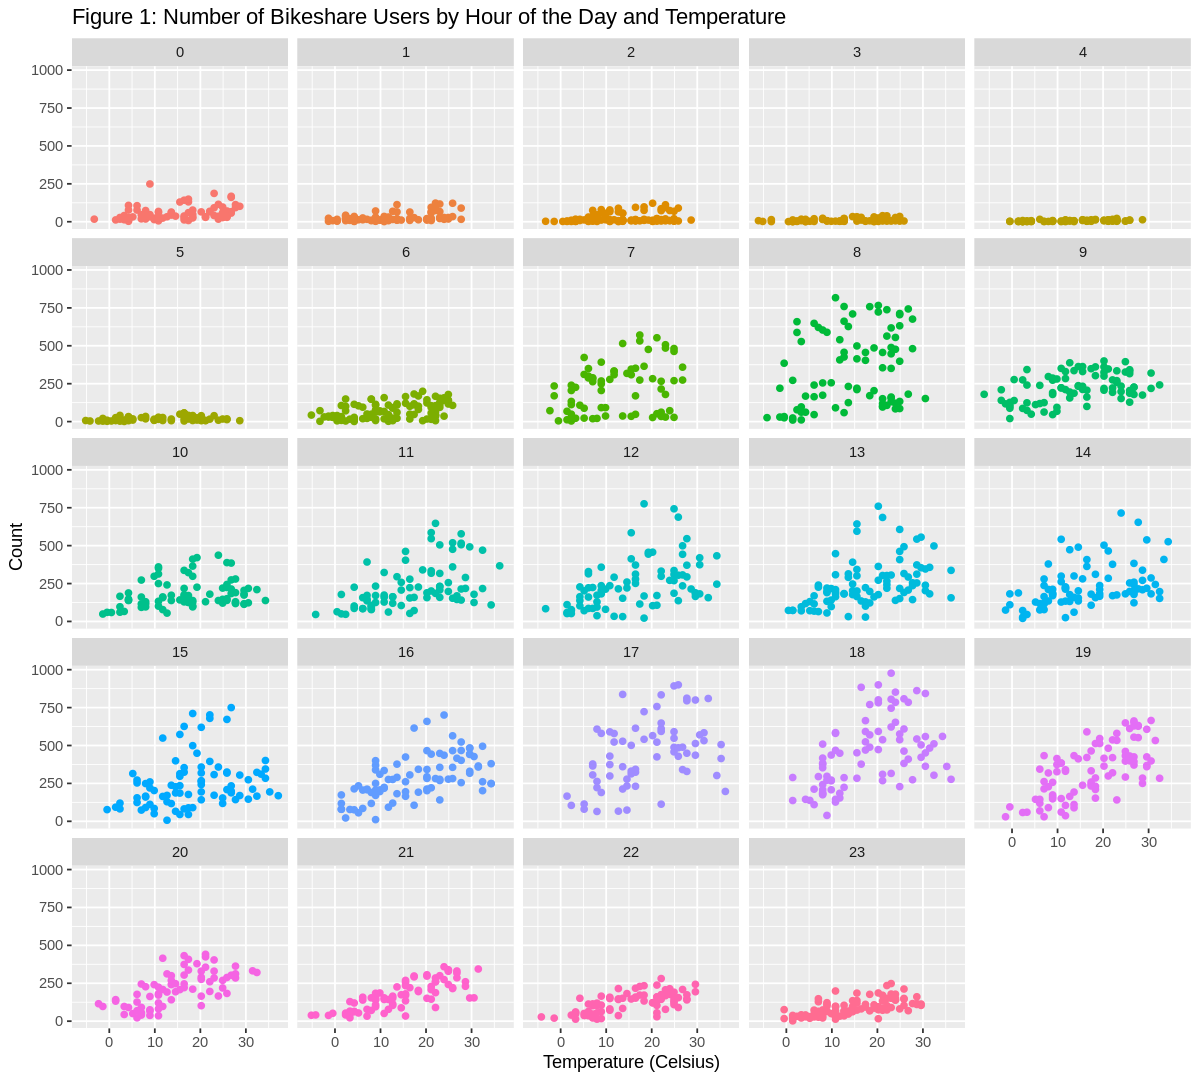

In [5]:
options(repr.plot.width = 10, repr.plot.height = 9)

bike_data_plot <- bike_data_subset %>% 
    ggplot(aes(x = temp, y = cnt, color = factor(hr))) +
    geom_point() +
    facet_wrap(facets = vars(hr)) +
    labs(title = "Figure 1: Number of Bikeshare Users by Hour of the Day and Temperature",
        x = "Temperature (Celsius)",
        y = "Count") +
    theme(legend.position = "none")

bike_data_plot

**Figure 1:** *The number of rental bike users per hour in a subset of 2000 observations in the dataset, plotted by temperature and faceted by hour of the day. Hour of the day is represented using numbers 0 to 23, with 0 meaning 00:00 military time, and 23 meaning 23:00.*

### Proposed analysis method:

For my analysis, I will work to answer the question **How are the temperature, windspeed, humidity, and hour of the day associated with the total number of bikeshare users per hour?** using Poisson linear regression. `temp`, `windspeed`, `hum` and `hr` will be the explanatory variables, while `cnt` will be the response variable. While there is an aggregated weather variable in the dataset (called `weathersit`), this variable does not have much nuance, and I would expect multicollinearity between `weathersit` and other weather variables, so I am opting not to use it. 

Poisson regression is an appropriate method to analyze this question as the response variable (`cnt`) is a count. As well, a majority of the explanatory variables are continuous, which makes for a good regression model, though regression is possible with categorical explanatory variables. However, a Poisson regression model comes with some assumptions. First, the model assumes that the response variable is a count per unit of time or space, known as a "Poisson response". This assumption is easily verified, as the `cnt` variable's identity as a count is driving the choice of a Poisson model. The second assumption is that the variables are independent of each other. This is an inherent part of the dataset, as each observation is a different point in time and is not dependent on past observations. The third assumption is that the mean of the response variable is equal to the variance. This is not necessarily true and will likely need to be statistically evaluated for this dataset. The final assumption is an assumption of linearity, which assumes that the log of the mean rate is a linear function of x, the input variables.

The two largest potential limitations of the model are multicollinearity and confounders. As shown in the visualization, the number of bikeshare users changes with both the temperature and the time of day, but the temperature also changes linearly with the time of day, which could create a multicollinearity problem. This could be further analyzed using the VIF, which I will do before implementing the model. While choosing the variables for the model, I chose specific weather components and avoided using the overall weather variable. While this is a good method to try and limit multicollinearity, the possibility of confounders remains. `temp` is included as an explanatory variable, but may be a confounder for `hum`, as the temperature changes how humidity is perceived. This means that as the temperature changes, the relationship between humidity and the number of users may change. 

Overall, I think that despite the addressed limitations, Poisson regression is a good method with which to address my question and will be able to provide an interpretable and effective analysis.


### Implementation of a proposed method:

First, we check the assumption that the mean and the variance of the target variable (in this case, `cnt`) are equal. We are separating by hour to see if that makes a difference in the variance or mean.

In [6]:
bike_data_variance_mean <- bike_data %>%
    group_by(hr) %>%
    summarize(mean = mean(cnt), 
              variance = var(cnt))

bike_data_variance_mean

hr,mean,variance
<dbl>,<dbl>,<dbl>
0,53.898072,1789.95925
1,33.375691,1124.84621
2,22.869930,706.42423
3,11.727403,175.27616
4,6.352941,17.17123
5,19.889819,174.26019
6,76.044138,3034.28534
7,212.064649,26063.49857
8,359.011004,55313.99988


There seems to be a problem with this assumption, as the variance is much larger than the mean. I will have to take this into account when assessing the results of the model.

The next step is actually creating the model.

In [7]:
bike_data_poisson_model <- glm(formula = cnt ~ hr + temp + windspeed + hum,
                               data = bike_data,
                               family = poisson)

I will now show the results of the Poisson model in a table using `tidy` to calculate the exponentiated regression parameters and a 95% confidence interval.

In [8]:
bike_data_poisson_model_tidy <- tidy(bike_data_poisson_model, exponentiate = TRUE, conf.int = TRUE)

bike_data_poisson_model_tidy

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),102.7782837,3.056118e-03,1515.83628,0.000000e+00,102.1644244,103.3957058
hr,1.0466193,9.056529e-05,503.12104,0.000000e+00,1.0464336,1.0468052
temp,1.0364743,6.192964e-05,578.47700,0.000000e+00,1.0363485,1.0366001
windspeed,1.0011523,6.972200e-05,16.51807,2.719748e-61,1.0010155,1.0012891
hum,0.9899287,3.082854e-05,-328.34501,0.000000e+00,0.9898688,0.9899885


**Figure 2:*** *Results of the Poisson regression model assessing the relationship between `cnt`, `hr`, `temp`, `windspeed`, and `hum`.*

While every variable is significant (holding all other variables constant), I believe these results should be interpreted with caution, as the differences (4.7%, 3.6%, 2.0%, and not even 1% for `hr`, `temp`, `hum`, and `windspeed` respectively) are quite small. As well, I observed in the preliminary visualization that the number of riders first increases with the hour but then decreases with the hour, making this relationship unlikely to be captured by a Poisson regression model, which uses a log term transformation but remains linear. A nonlinear regression model may be better suited to analyzing the relationship of `hr` and `cnt`, as a transformation of the `hr` variable itself would disrupt the variable's meaningfulness and make the results less interpretable. Overall, I find the statistically significant results unexpected, as upon analysis, the model does not seem to be well suited to the data. 